PROYECTO MACHINE LEARNING AIRBNB
PARTICIPANTES:

BRYAM DAVID CHAMBA JARAMILLO

ALVAR YEBEL DE BLAS FERNÁNDEZ

MARÍA GARCÍA RODRIGUEZ

MANUEL GRAU ROLDÁN

ÁLVARO MARTÍN LÓPEZ

LUIS JAVIER NATES ARECHAVALETA

In [35]:
import funciones_auxiliares 

import numpy as np
import pandas as pd
import datetime

#Aprendizaje automático
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('airbnb-listings-extract.csv', sep=';', error_bad_lines=False)

C:\Users\Luis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.shape

(14780, 89)

In [4]:
data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [5]:
data.isna().sum()

ID                                   0
Listing Url                          0
Scrape ID                            0
Last Scraped                         0
Name                                 1
                                  ... 
Cancellation Policy                  0
Calculated host listings count       4
Reviews per Month                 3162
Geolocation                          0
Features                             1
Length: 89, dtype: int64

In [6]:
lista_fuera = []
for i in data.columns:
    if data[i].isna().sum() > 0.3*len(data.index):
        lista_fuera.append(i)
data = data.drop(columns=lista_fuera)

In [7]:
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Thumbnail Url,...,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,https://a0.muscache.com/im/pictures/c351a9b5-5...,...,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,https://a0.muscache.com/im/pictures/3ce27aee-f...,...,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,https://a0.muscache.com/im/pictures/fd4528f3-f...,...,NaN,NaN,NaN,NaN,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,https://a0.muscache.com/im/pictures/77343485/3...,...,9.0,10.0,10.0,10.0,9.0,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,https://a0.muscache.com/im/pictures/d26f6f1b-f...,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [8]:
data = data.drop(['Listing Url', 'Name','Scrape ID', 'Last Scraped','Summary','Space','Description','Thumbnail Url',
                  'Medium Url','Picture Url','XL Picture Url','Thumbnail Url','Host Thumbnail Url', 'Host Location',
                  'Geolocation','Features','Host URL', 'Host Picture Url','Host Name','First Review', 'Last Review','Host Verifications'], axis = 1)
#

Podemos eliminar también algunas de las referencias a la localización de los airbnb, ya que son datos redundantes y con la longitud y la latitud, en principio, puede valernos

In [9]:
data = data.drop(['Zipcode','Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Market', 'Smart Location',
                  'Country Code', 'Country','Host Neighbourhood'], axis=1)

In [10]:
data.head()

,ID,Experiences Offered,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
0,11210388,none,58386783,2016-02-11,within an hour,100.0,1.0,1.0,30.337361,-97.863277,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.50
1,17471131,none,102947901,2016-11-08,within an hour,100.0,162.0,162.0,41.389683,2.172625,...,80.0,8.0,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86
2,17584891,none,102947901,2016-11-08,within an hour,100.0,162.0,162.0,41.393035,2.162173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,super_strict_30,106.0,NaN
3,5398030,none,131794,2010-05-25,within an hour,100.0,27.0,27.0,41.396967,2.167418,...,92.0,10.0,9.0,10.0,10.0,10.0,9.0,strict,24.0,1.09
4,18104606,none,54310958,2016-01-12,within an hour,99.0,207.0,207.0,41.388685,2.155150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN


In [11]:
data.dtypes

ID                                  int64
Experiences Offered                object
Host ID                             int64
Host Since                         object
Host Response Time                 object
Host Response Rate                float64
Host Listings Count               float64
Host Total Listings Count         float64
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Amenities                          object
Price                             float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                      int64
Calendar Updated                  

Variable a predecir, la llamaremos y para realizar luego la regresión sobre ella

In [12]:
y = data['Price']

Creamos listas que contentgan los nombres de las variables a estudiar dependiendo su tipo

In [13]:
list_var_continuous = list(data.select_dtypes('float').columns)
list_var_discrets = list(data.select_dtypes('O').columns)

data[list_var_discrets]

,Experiences Offered,Host Since,Host Response Time,Property Type,Room Type,Bed Type,Amenities,Calendar Updated,Calendar last Scraped,Cancellation Policy
0,none,2016-02-11,within an hour,Loft,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",today,2017-03-06,moderate
1,none,2016-11-08,within an hour,Apartment,Entire home/apt,Real Bed,"Wireless Internet,Air conditioning,Elevator in...",today,2017-04-08,super_strict_30
2,none,2016-11-08,within an hour,Apartment,Entire home/apt,Real Bed,"Wireless Internet,Air conditioning,Elevator in...",today,2017-04-08,super_strict_30
3,none,2010-05-25,within an hour,Apartment,Entire home/apt,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",today,2017-04-08,strict
4,none,2016-01-12,within an hour,Apartment,Entire home/apt,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",today,2017-04-08,flexible
...,...,...,...,...,...,...,...,...,...,...
14775,none,2013-12-18,within a few hours,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",5 days ago,2017-05-02,strict
14776,none,2017-03-24,NaN,Bed & Breakfast,Private room,Real Bed,"TV,Wireless Internet,Kitchen,Breakfast,Elevato...",3 days ago,2017-04-06,flexible
14777,none,2015-07-06,within an hour,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",5 days ago,2017-04-05,strict
14778,none,2013-03-20,within a few hours,Apartment,Entire home/apt,Real Bed,"Internet,Wireless Internet,Kitchen,Heating,Was...",yesterday,2016-05-18,moderate


Hagamos la matriz de correlación para ver si algunas variables aportan información similar a nuestro modelo de regresión, lo que permitiría eliminar algunas variables

1. Primero rellenemos los valores missing imputándolos por el método KNN Imputer

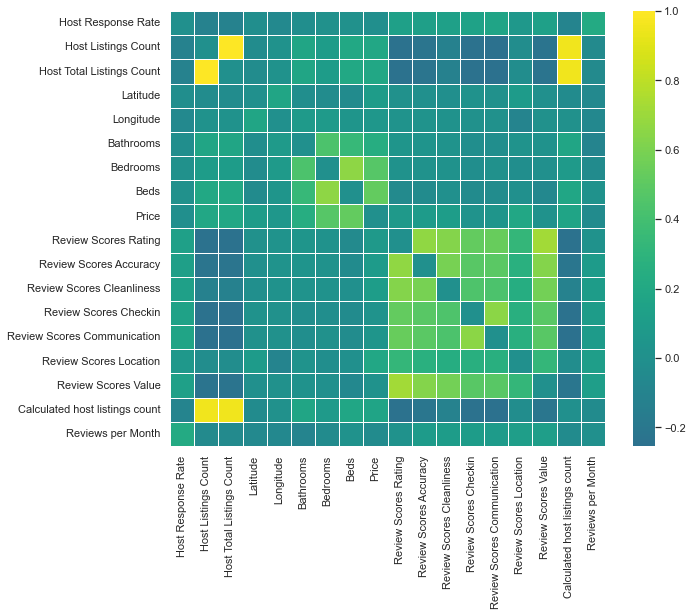

0

In [14]:
funciones_auxiliares.get_corr_matrix(dataset = data[list_var_continuous], metodo='spearman', size_figure=[10,8])

Con un simple análisis cualitativo parece claro que 3 variables (las relacionadas tienen una correlaión perfecta por lo que podemos prescindir e dos de ellas y simplificar algo el modelo

In [15]:
data = data.drop(['Host Listings Count'], axis = 1)

In [18]:
data.columns

Index(['ID', 'Experiences Offered', 'Host ID', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Host Total Listings Count',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Calendar Updated', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

## Valores missing e imputación

Primero las variables continuas

In [37]:
list_var_continuous = list(data.select_dtypes('float').columns)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data[list_var_continuous])
data[list_var_continuous]=imputer.transform(data[list_var_continuous])

Comencemos con la fecha desde la que el anfitrión está registrado en la plataforma

In [40]:
fecha = pd.to_datetime(data['Host Since'])
#Creamos una variable que reste la actualidad (3/6/2022) a la fecha del anfitrión 
#Nota para eliminar, esto es igual que en big data
tiempo_anfitrión = (pd.datetime(2022, 6, 3) - fecha).astype('timedelta64[D]')
#Sustituimos por la variable fecha para que sea más sencillo utilizarla a la hora de los modelos 
data['Tiempo Anfitrión Días'] = tiempo_anfitrión
data['Tiempo Anfitrión Días'] = data['Tiempo Anfitrión Días'].fillna(0)
#Podemos eliminar si queremos la variable Host Since, la dejaré por el momento

C:\Users\Luis\AppData\Local\Temp/ipykernel_22444/525923490.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  tiempo_anfitrión = (pd.datetime(2022, 6, 3) - fecha).astype('timedelta64[D]')
